# Monte Carlo Simulation for Portfolio Risk Analysis
This notebook uses Monte Carlo simulation to analyze portfolio risk and return under uncertainty. 
We compare different portfolio allocations and study how diversification benefits change with correlation.

In [26]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Problem Setup and Assumptions
We consider a portfolio with two risky assets.
- Asset returns are assumed to follow a multivariate normal distribution.
- Mean returns, volatilities, and correlation are specified exogenously.
- Portfolio returns are computed as weighted combinations of asset returns.

In [27]:
np.random.seed(42)

n_simulations = 10000

# Asset assumptions (annualized)
mean_returns = np.array([0.08, 0.12])   # annualized
vols = np.array([0.15, 0.25])
correlation = 0.3

# Covariance Matrix
cov_matrix = np.array([
    [vols[0]**2, correlation*vols[0]*vols[1]],
    [correlation*vols[0]*vols[1], vols[1]**2]
])

# Conservative Portfolio Weights
weights = np.array([0.6, 0.4])

## 2. Monte Carlo Simulation of Asset and Portfolio Returns
We generate a large number of possible future return scenarios using Monte Carlo simulation.
Portfolio returns are computed by applying portfolio weights to simulated asset returns.

In [28]:
returns = np.random.multivariate_normal(
    mean_returns,
    cov_matrix,
    n_simulations
)

portfolio_returns = returns @ weights

mean_port = np.mean(portfolio_returns)
vol_port = np.std(portfolio_returns)

mean_port, vol_port

(np.float64(0.09701834462107042), np.float64(0.15429033630028471))

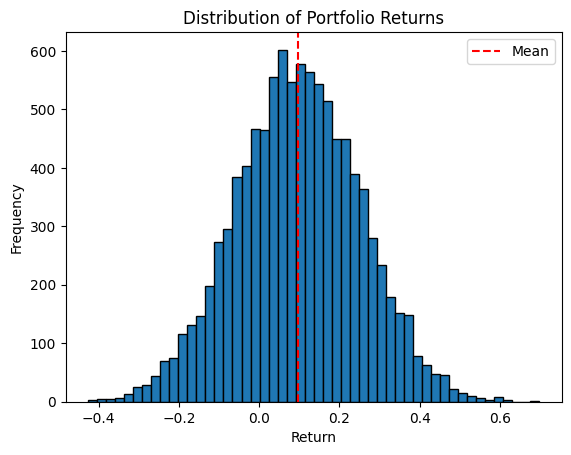

In [29]:
plt.hist(portfolio_returns, bins=50, edgecolor='k')
plt.axvline(mean_port, color='r', linestyle='--', label='Mean')
plt.title("Distribution of Portfolio Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 3. Downside Risk Measurement
To capture tail risk, we compute Value-at-Risk (VaR) using percentile-based measures.

In [30]:
var_5 = np.percentile(portfolio_returns, 5)
var_1 = np.percentile(portfolio_returns, 1)

var_5, var_1


(np.float64(-0.15943464002953023), np.float64(-0.26050789938599256))

## 4. Portfolio Comparison: Conservative vs Aggressive
We compare a conservative portfolio with a more aggressive allocation to study risk–return tradeoffs.

In [31]:
weights_aggressive = np.array([0.3, 0.7])
portfolio_returns_aggressive = returns @ weights_aggressive


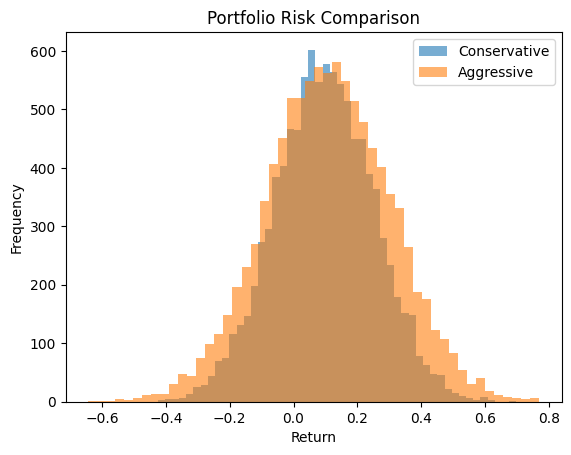

In [32]:
plt.hist(portfolio_returns, bins=50, alpha=0.6, label='Conservative')
plt.hist(portfolio_returns_aggressive, bins=50, alpha=0.6, label='Aggressive')
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.title("Portfolio Risk Comparison")
plt.show()

## 5. Sensitivity Analysis to Correlation
We study how portfolio risk and return change as correlation between assets varies.
This helps evaluate the robustness of diversification benefits.

In [33]:
correlations = [0.0,0.3,0.6,0.9]

vols_cons = []
vols_aggr = []
mean_cons = []
mean_aggr = []

for corr in correlations:
    cov_matrix = np.array([
        [vols[0]**2, corr*vols[0]*vols[1]],
        [corr*vols[0]*vols[1], vols[1]**2]
    ])
    
    returns = np.random.multivariate_normal(
        mean_returns,
        cov_matrix,
        n_simulations
    )
    
    port_cons = returns @ weights
    port_aggr = returns @ weights_aggressive
    
    vols_cons.append(np.std(port_cons))
    vols_aggr.append(np.std(port_aggr))

    mean_cons.append(np.mean(port_cons))
    mean_aggr.append(np.mean(port_aggr))

In [34]:
sensitivity_df = pd.DataFrame({
    "Correlation": correlations,
    "Conservative Mean Return": mean_cons, 
    "Conservative Volatility": vols_cons,
    "Aggressive Mean Return": mean_aggr,
    "Aggressive Volatility": vols_aggr,
})

sensitivity_df

,Correlation,Conservative Mean Return,Conservative Volatility,Aggressive Mean Return,Aggressive Volatility
0,0.0,0.094150,0.134944,0.106483,0.181637
1,0.3,0.097770,0.152405,0.111164,0.193035
2,0.6,0.095227,0.171115,0.107430,0.206377
3,0.9,0.095751,0.186876,0.107667,0.218325


## 6. Effect of Correlation on Portfolio Risk

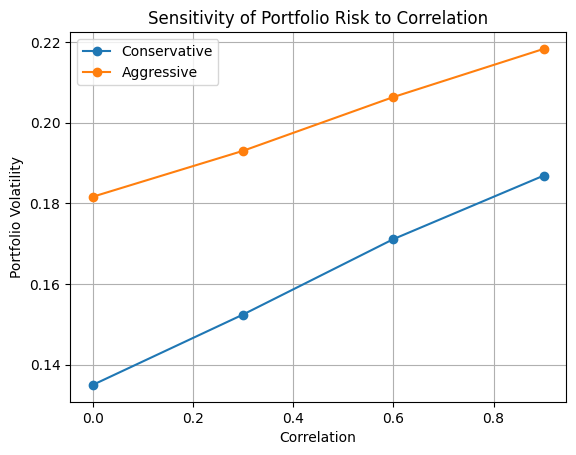

In [35]:
plt.plot(correlations, vols_cons, marker='o', label='Conservative')
plt.plot(correlations, vols_aggr, marker='o', label='Aggressive')
plt.xlabel("Correlation")
plt.ylabel("Portfolio Volatility")
plt.title("Sensitivity of Portfolio Risk to Correlation")
plt.legend()
plt.grid(True)
plt.show()


## 7. Risk–Return Tradeoff
We visualize how expected return changes relative to risk across different correlation assumptions.

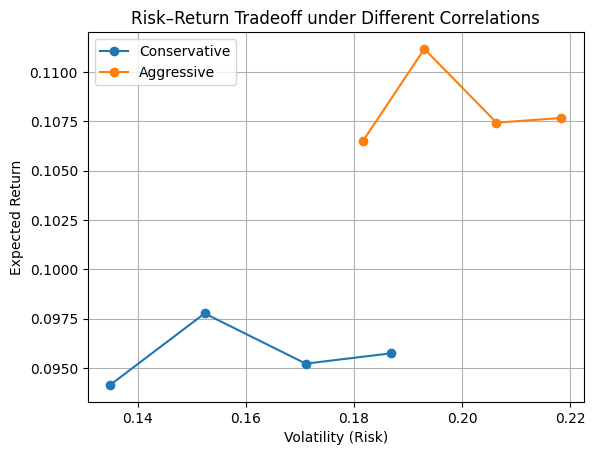

In [36]:
plt.plot(vols_cons, mean_cons, marker='o', label='Conservative')
plt.plot(vols_aggr, mean_aggr, marker='o', label='Aggressive')

plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Risk–Return Tradeoff under Different Correlations")
plt.legend()
plt.grid(True)
plt.show()


## Key Observations

- Aggressive portfolios achieve higher expected returns but are exposed to significantly higher volatility.
- Diversification benefits decrease as asset correlation increases.
- Expected returns remain relatively stable across correlations, while risk increases substantially.
- Monte Carlo simulation provides a more complete view of risk than point estimates alone.